# Challenge 3

In this challenge we will work on the `Orders.csv` data set in the previous [Subsetting and Descriptive Stats lab](../../lab-subsetting-and-descriptive-stats/your-code/main.ipynb). In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

# Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

In [4]:
# import required libraries
import numpy as np
import pandas as pd

Next, import `Orders.csv` from the "subsetting" lab folder into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [5]:
# enter your code here
orders = pd.read_csv('C:/Users/Data Analyst/Documents/GitHub\datamex0120/module-2/lab-subsetting-and-descriptive-stats/your-code/Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?


We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

In [55]:
### Unique Customers Problem 1 and Problem 2 
u = orders[orders.groupby('CustomerID')['StockCode'].transform('size') == 1] 
u.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,72.0,218401.902778,158236.626334,252.0,88866.25,191951.50,315206.0000,533812.0
InvoiceNo,72.0,555363.833333,13656.762178,536393.0,543853.50,553392.50,564618.5000,581115.0
year,72.0,2010.875000,0.333040,2010.0,2011.00,2011.00,2011.0000,2011.0
month,72.0,6.805556,3.829606,1.0,3.00,7.00,11.0000,12.0
day,72.0,3.319444,1.382245,1.0,2.00,3.00,4.0000,7.0
hour,72.0,12.652778,2.540709,8.0,10.75,12.00,15.0000,19.0
Quantity,72.0,1397.500000,8841.583218,1.0,9.50,43.50,144.0000,74215.0
UnitPrice,72.0,49.570278,249.470301,0.0,1.06,2.65,8.6125,2033.1
CustomerID,72.0,15860.750000,1771.993417,12346.0,14405.75,16006.50,17511.0000,18268.0
amount_spent,72.0,1360.517500,9082.535440,0.0,51.75,100.60,268.0200,77183.6


In [17]:
#### Average amount spent by country Australia | Japan | Netherlands top 3 
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

In [19]:
### Top 10 Customer most spending amount, none on the top 3 average amount spent by countries
top = orders[orders.amount_spent>22]
top.nlargest(10,'amount_spent')

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
397451,540421,581483,23843,2011,12,5,9,"paper craft , little birdie",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60
37126,61619,541431,23166,2011,1,2,10,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
155418,222680,556444,22502,2011,6,5,15,picnic basket wicker 60 pieces,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
248706,348325,567423,23243,2011,9,2,11,set of tea coffee sugar tins pantry,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72
32732,52711,540815,21108,2011,1,2,12,fairy cake flannel assorted colour,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.40
109624,160546,550461,21108,2011,4,1,13,fairy cake flannel assorted colour,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,6539.40
308097,421601,573003,23084,2011,10,4,12,rabbit night light,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00
32730,52709,540815,85123A,2011,1,2,12,white hanging heart t-light holder,1930,2011-01-11 12:55:00,2.55,15749,United Kingdom,4921.50
109620,160542,550461,85123A,2011,4,1,13,white hanging heart t-light holder,1930,2011-04-18 13:20:00,2.40,15749,United Kingdom,4632.00


Quantile .25:  4.68 Mean : 22.39474850474768 Quantile .75:  19.8


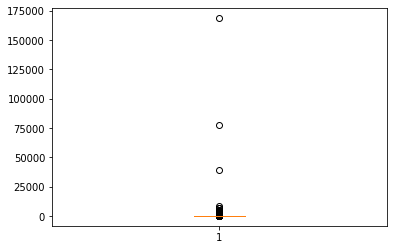

In [11]:
### Amount spent distribution 
import matplotlib.pyplot as plt
amount = orders.amount_spent 
plt.boxplot(amount);
print('Quantile .25: ',amount.quantile(.25),'Mean :',amount.mean(), 'Quantile .75: ',amount.quantile(.75))

In [29]:
## Cleaning outliers to analyze the major customer density
stats = orders.describe().T
stats['IQR'] = stats['75%']-stats['25%']
outliers = pd.DataFrame(columns = orders.columns)
for e in stats.index:
    iqr = stats.at[e, 'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[e,'25%']-cutoff
    upper = stats.at[e, '75%']+ cutoff
    results = orders[(orders[e]<lower)|(orders[e]>upper)].copy()
    results['outliers'] = e
    outliers = outliers.append(results, sort = True)

outliers['outliers'].value_counts()


UnitPrice       34356
amount_spent    31239
year            26160
Quantity        25656
hour             4125
Name: outliers, dtype: int64

In [33]:
## Data Cleaning 
outliers['outliers'].value_counts()
clean_index = [i for i in orders.index if i not in outliers.index]

In [41]:
## Data Frame Clean 
orders2 = pd.DataFrame(columns = orders.columns)           
orders2 = orders.iloc[clean_index]


In [48]:
## Major buyers without outliers, "preferred customers" that buy more constantly 
top = orders2[orders2.amount_spent>22]
top.nlargest(10,'amount_spent')

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
263984,367738,568904,22687,2011,9,4,13,doormat christmas village,6,2011-09-29 13:29:00,7.08,14691,United Kingdom,42.48
188654,270717,560580,23134,2011,7,2,15,large zinc heart wall organiser,6,2011-07-19 15:23:00,7.05,14088,United Kingdom,42.30
116593,171261,551399,22900,2011,4,4,13,set 2 tea towels i love london,13,2011-04-28 13:17:00,3.25,17874,United Kingdom,42.25
45188,74584,542503,22381,2011,1,5,11,toy tidy pink polkadot,20,2011-01-28 11:58:00,2.10,16327,United Kingdom,42.00
46834,77046,542678,22379,2011,1,1,12,recycling bag retrospot,20,2011-01-31 12:21:00,2.10,14688,United Kingdom,42.00
48922,79529,542996,22078,2011,2,3,12,ribbon reel lace design,20,2011-02-02 12:10:00,2.10,15046,United Kingdom,42.00
49070,80061,543015,22379,2011,2,3,13,recycling bag retrospot,20,2011-02-02 13:46:00,2.10,14188,United Kingdom,42.00
49072,80063,543015,22664,2011,2,3,13,toy tidy dolly girl design,20,2011-02-02 13:46:00,2.10,14188,United Kingdom,42.00
49074,80065,543015,22380,2011,2,3,13,toy tidy spaceboy,20,2011-02-02 13:46:00,2.10,14188,United Kingdom,42.00
57377,91641,544111,22078,2011,2,3,11,ribbon reel lace design,20,2011-02-16 11:18:00,2.10,16126,United Kingdom,42.00


Now we'll leave it to you to solve Q2 & Q3, which you can leverage from your solution for Q1:

# Q2: How to identify which country has the most VIP Customers?

# Q3: How to identify which country has the most VIP+Preferred Customers combined?

Provide your solution for Q2 below:

In [59]:
orders2.Country.value_counts() ## United Kingdom & Germany 

United Kingdom          274448
Germany                   6787
France                    6313
EIRE                      4892
Spain                     1955
Belgium                   1558
Switzerland               1309
Portugal                  1054
Norway                     594
Italy                      548
Channel Islands            517
Finland                    492
Netherlands                491
Australia                  419
Cyprus                     399
Austria                    321
Poland                     240
Sweden                     224
Unspecified                210
Denmark                    199
Israel                     180
USA                        157
Iceland                    131
Canada                     125
Singapore                  111
Greece                     106
Malta                       91
Japan                       72
United Arab Emirates        55
RSA                         46
European Community          45
Lebanon                     27
Brazil  

In [ ]:
# your code here